In [1]:
import numpy as np
import pandas as pd
import os
import fgt_main
import matplotlib.pyplot as plt

In [2]:
def generate_1d_pnts(num_points): 
    points1 = np.random.normal(-2, 1, num_points // 2)

    # Generate 500 points from N(2,1)
    points2 = np.random.normal(2, 1, num_points // 2)

    # Combine the points using vstack and then flatten
    points = np.vstack((points1, points2)).flatten()

    filename = os.path.join("data", f'1d_data_{num_points}.txt')
    df_x = pd.DataFrame(points, columns=['x'])
    #print(df_x)
    df_x.to_csv(filename, sep=' ', index=False, header=False)

    return points

In [53]:
mu_1 = [2, 0]
sigma_1 = [[1, 0], 
           [0, 1]]  

mu_2 = [0, 2]
sigma_2 = [[0.5, 0.5],
           [0.5, 1]]

means = [mu_1, mu_2]
covars = [sigma_1, sigma_2]
weights = [1/3, 2/3]

def generate_2d_pnts(num_points, weights, means, covars):
    data_points = np.vstack([
        np.random.multivariate_normal(mean, cov, int(weight * num_points))
        for weight, mean, cov in zip(weights, means, covars)])
    filename = os.path.join("data", f'2d_data_{num_points}.txt')
    df_x = pd.DataFrame(data_points, columns=['x', 'y'])
    df_x.to_csv(filename, sep=' ', index=False, header=False)
    return data_points

In [54]:
generate_1d_pnts(50_000)

array([-1.6151366 , -2.024732  , -4.30995009, ...,  1.39228997,
        3.73806564,  2.64658924])

In [65]:
generate_2d_pnts(50_000, weights,means,covars)

array([[2.01112917, 2.05565935],
       [1.35433621, 0.72251193],
       [2.90506101, 0.62480589],
       ...,
       [0.10931657, 1.92939894],
       [0.67093019, 2.89560094],
       [1.33312475, 2.63528599]])

In [4]:
eps = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

In [5]:
eps = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
bench_out = fgt_main.bench_error_and_accuracy(0.33, eps, os.path.join("data", f'1d_data_10000.txt'))


In [39]:
bench_out_50000 = fgt_main.bench_error_and_accuracy(0.33, eps, os.path.join("data", f'1d_data_50000.txt'))

In [60]:
bench_out_2d_2000 = fgt_main.bench_error_and_accuracy(0.4, eps, os.path.join("data", f'2d_data_2000.txt'))

In [66]:
bench_out_2d_50000 = fgt_main.bench_error_and_accuracy(0.4, eps, os.path.join("data", f'2d_data_50000.txt'))

In [78]:
generate_2d_pnts(100_000, weights,means,covars)

array([[ 1.49609735, -0.04533028],
       [ 0.79031472, -1.46097573],
       [ 2.21956453, -0.57604698],
       ...,
       [-0.19353948,  2.81590355],
       [ 0.45215546,  2.85817859],
       [-1.18246308,  0.80053098]])

In [79]:
bench_out_2d_100000 = fgt_main.bench_error_and_accuracy(0.4, eps, os.path.join("data", f'2d_data_100000.txt'))

In [6]:
print(bench_out)

[[0.22465899943279055, 1.4835002843938128e-06, 0.22731199942609237, 1.4835002843938128e-06, 0.22658599942792534, 1.4835002843938128e-06, 0.034413999913113, 0.003985794881898208, 0.034730999912312654, 0.003985794881898208, 0.034467999912976666, 0.003985794881898208], [0.21556199945575827, 1.5186151642865298e-05, 0.21384199946010085, 1.5186151642865298e-05, 0.21311799946192878, 1.5186151642865298e-05, 0.03336099991577157, 0.003985794881898208, 0.033206999916160385, 0.003985794881898208, 0.03402199991410271, 0.003985794881898208], [0.19991599949526062, 0.00015145246084102837, 0.19982199949549795, 0.00015145246084102837, 0.2028089994879565, 0.00015145246084102837, 0.041101999896227426, 0.0005405256323456342, 0.04094999989661119, 0.0005405256323456342, 0.042171999893525935, 0.0005405256323456342], [0.18789799952560315, 0.0015457175889537211, 0.19157299951632467, 0.0015457175889537211, 0.18965899952115706, 0.0015457175889537211, 0.03282999991711222, 0.003985794881898208, 0.03220699991868514,

In [ ]:
bench_accuracy_out = fgt_main.bench_accuracy(0.33, eps, os.path.join("data", f'1d_data_50000.txt'))

In [ ]:
print(bench_error_out)

[[29.995735924268047, 29.144229926417893, 29.214037926241645, 0.3854659990267919, 0.3851299990276402, 0.3858369990258552], [27.941226929455183, 27.366873930905285, 29.54533092540521, 0.39205599901015376, 0.4061069989746784, 0.3949129990029405], [26.4039239333365, 26.56086993294025, 26.06583993419008, 0.5421549986311902, 0.545413998622962, 0.543395998628057], [25.661514935210903, 23.896285939667678, 23.587277940447848, 0.3656949990767089, 0.3629949990835257, 0.36437599908003904], [22.04030094435359, 21.519013945669712, 21.918848944660226, 0.48598799877299825, 0.48670799877118043, 0.4838819987783154], [18.882106952327263, 19.005555952015584, 18.886883952315202, 0.5055909987235054, 0.5008969987353566, 0.5562879985955078], [16.123261959292677, 15.793855960124347, 15.929737959781278, 0.48019499878762417, 0.48169499878383704, 0.4821579987826681]]


In [9]:
def seperate_error_and_accuracy(arr, eps):
    error_res, accuracy_res = [],[]
    assert(len(arr) == len(eps))
    for row, epsilon in zip(arr,eps):
        error_res.append(row[::2])
        accuracy_res.append(row[1::2])
    return error_res, accuracy_res

In [22]:
error_res_10000, accuracy_res_10000 = seperate_error_and_accuracy(bench_out, eps)

In [40]:
error_res_50000, accuracy_res_50000 = seperate_error_and_accuracy(bench_out_50000, eps)

In [41]:
error_res_50000

[[6.31671398405183,
  6.081797984644936,
  6.167135984429478,
  0.18464799953380862,
  0.18664899952875658,
  0.1871929995273831],
 [5.812077985325914,
  5.861471985201206,
  5.79900098535893,
  0.18908199952261384,
  0.18365399953631822,
  0.18491299953313955],
 [5.411722986336713,
  5.391675986387327,
  5.406962986348731,
  0.1956959995059151,
  0.19678499950316564,
  0.19703099950254455],
 [5.080914987171923,
  4.998251987380627,
  5.0050899873633625,
  0.1753709995572308,
  0.18071299954374354,
  0.17546999955698084],
 [4.539015988540086,
  4.543467988528846,
  4.532497988556543,
  0.24002699939399008,
  0.23995099939418196,
  0.2394849993953585],
 [4.027755989830894,
  3.9984839899047984,
  4.024806989838339,
  0.1815459995416404,
  0.1824269995394161,
  0.2451029993811744],
 [3.5783309909655827,
  3.4050379914031055,
  3.3330599915848325,
  0.17483499955858406,
  0.17191499956595635,
  0.1718929995660119]]

In [27]:
def create_df(arr, eps):
    new_arr = []
    print(len(arr), len(eps))
    for row, epsilon in zip(arr, eps):
        direct_tree = row[:3]
        ifgt = row[3:]
        new_arr.append(["direct_tree", epsilon] + direct_tree)
        new_arr.append(["ifgt", epsilon] + ifgt)
    df = pd.DataFrame(new_arr, columns=['mode', 'epsilon', 'run_1', 'run_2', 'run_3'])
    df["avg"] = df[[f'run_{i}' for i in range(1, 4)]].mean(axis=1)
    return df

In [33]:
df_error_10000 = create_df(error_res_10000,eps)

7 7


In [32]:
df_accuracy_10000 = create_df(accuracy_res_10000,eps)

7 7


In [42]:
df_error_50000 = create_df(error_res_50000,eps)
df_accuracy_50000 = create_df(accuracy_res_50000,eps)

7 7
7 7


In [69]:
def plot_error(df):
    df["avg"] = df[[f'run_{i}' for i in range(1, 4)]].mean(axis=1)
    df_dt = df[df["mode"] == "direct_tree"]
    plt.plot(np.log10(df_dt["epsilon"]), df_dt["avg"], label="direct_tree",  marker='o', linestyle='-')
    df_ifgt = df[df["mode"] == "ifgt"]
    plt.plot(np.log10(df_ifgt["epsilon"]), df_ifgt["avg"], label="ifgt",  marker='o', linestyle='-')
    plt.grid()
    plt.xlabel("log10 epsilon")
    plt.ylabel("time to run")
    plt.legend()
    plt.show()


In [70]:
def plot_accuracy(df):
    df["avg"] = df[[f'run_{i}' for i in range(1, 4)]].mean(axis=1)
    df_dt = df[df["mode"] == "direct_tree"]
    plt.plot(np.log10(df_dt["epsilon"]), np.log10(df_dt["avg"]), label="direct_tree",  marker='o', linestyle='-')
    df_ifgt = df[df["mode"] == "ifgt"]
    plt.plot(np.log10(df_ifgt["epsilon"]), np.log10(df_ifgt["avg"]), label="ifgt",  marker='o', linestyle='-')
    plt.grid()
    plt.xlabel("log10 error bound")
    plt.ylabel("log10 true error")
    plt.legend()
    plt.show()


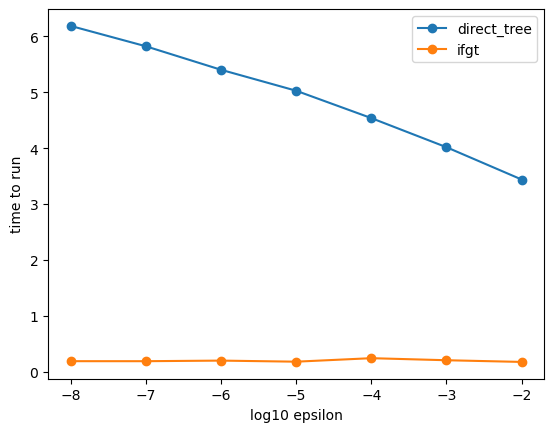

In [45]:
plot_error(df_error_50000)

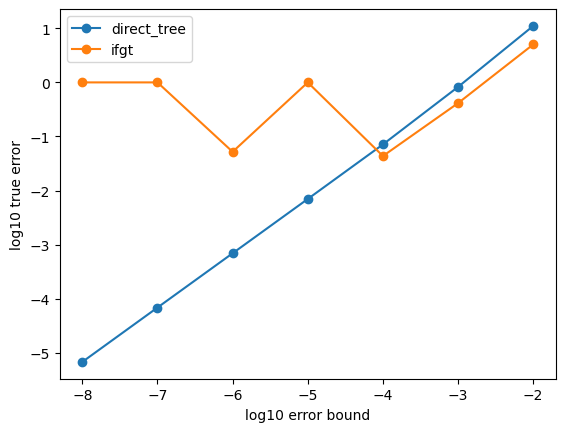

In [46]:
plot_accuracy(df_accuracy_50000)

In [71]:
def combined_fn(combined_res, eps):
    error_res, accuracy_res = seperate_error_and_accuracy(combined_res, eps)
    error_df, accuracy_df = create_df(error_res,eps), create_df(accuracy_res,eps)
    plot_error(error_df)
    plot_accuracy(accuracy_df)

7 7
7 7


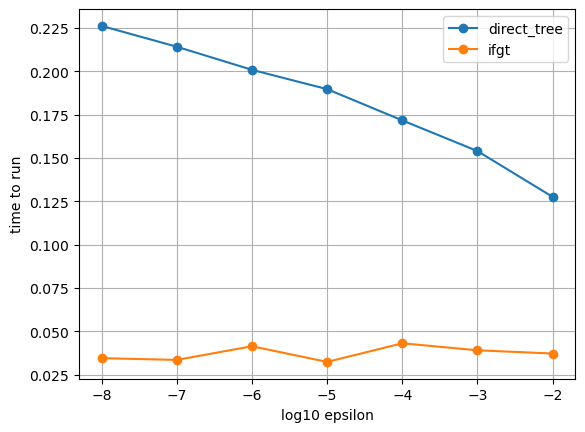

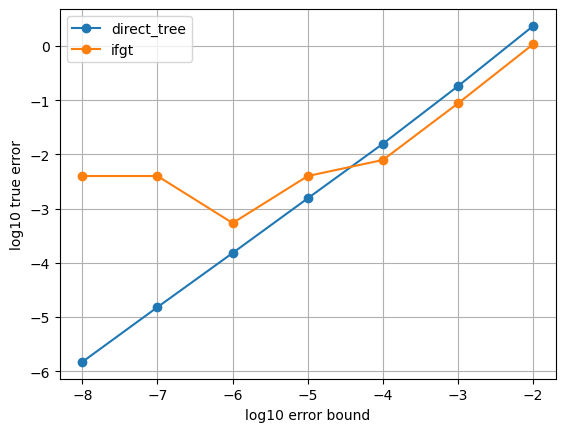

In [77]:
bench_out_10000 = bench_out
combined_fn(bench_out_10000, eps)

7 7
7 7


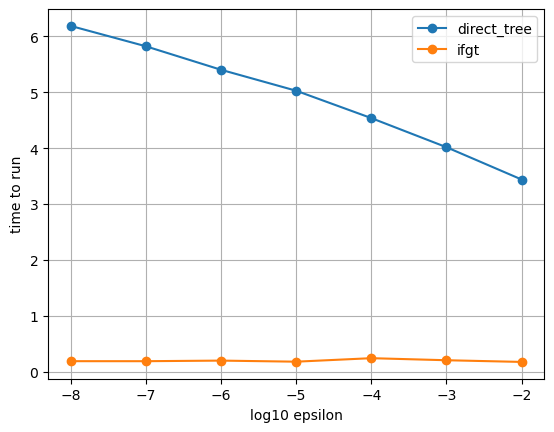

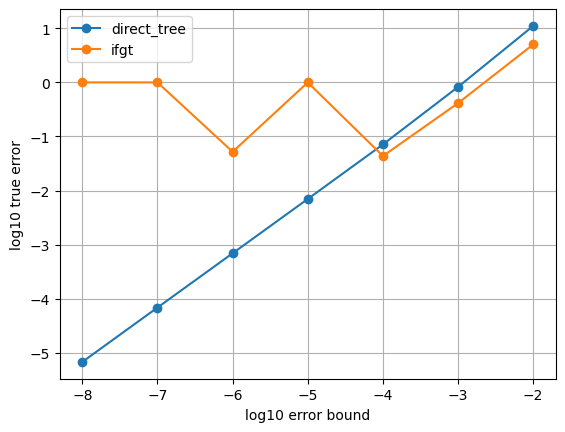

In [72]:
combined_fn(bench_out_50000, eps)

7 7
7 7


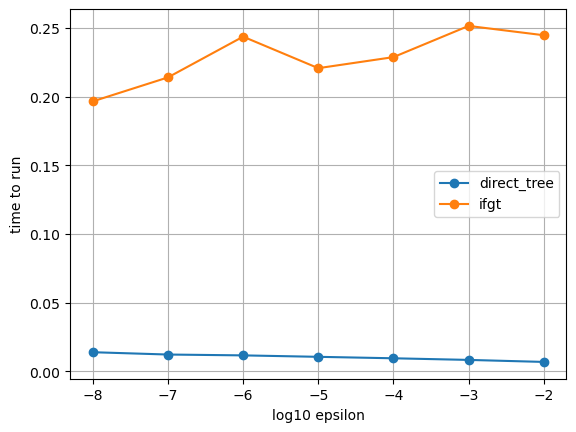

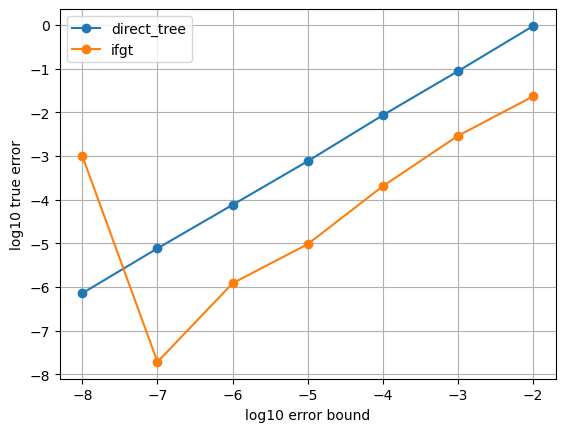

In [76]:
combined_fn(bench_out_2d_2000, eps)

7 7
7 7


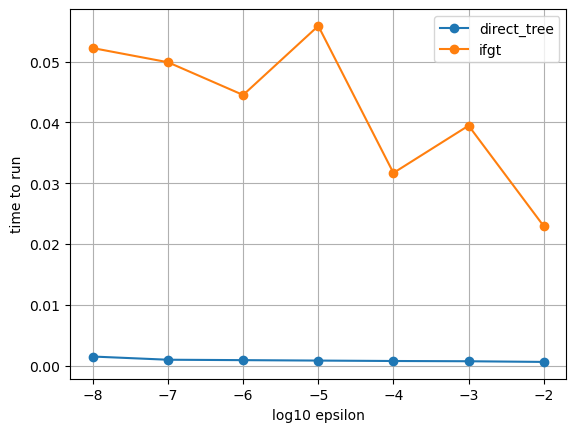

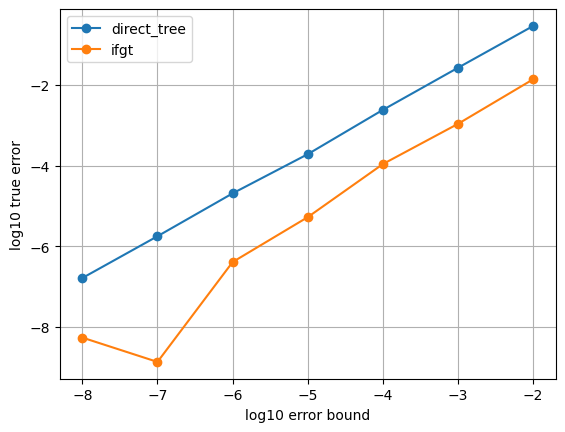

In [73]:
combined_fn(bench_out_2d_5000, eps)

7 7
7 7


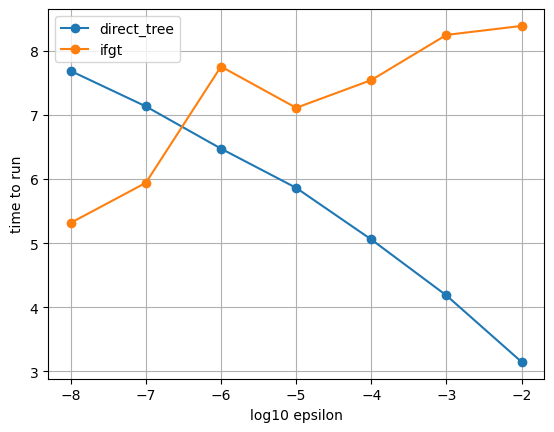

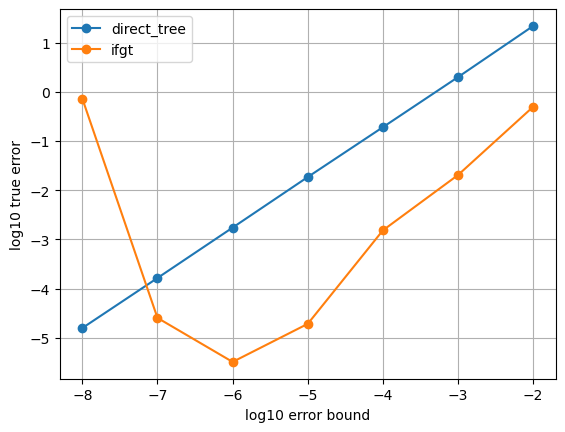

In [74]:
combined_fn(bench_out_2d_50000, eps)

In [ ]:
bench_out_2d_50000 = fgt_main.bench_error_and_accuracy(0.4, eps, os.path.join("data", f'2d_data_50000.txt'))